# importing libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load the data

In [2]:
advert=pd.read_csv("Advertising.csv")
advert.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# Remove the index column

In [4]:
advert.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
advert.drop(['Unnamed: 0'],axis=1,inplace=True)
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Exploratory Data Analysis

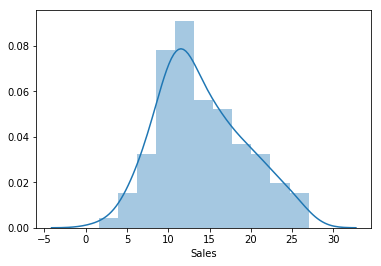

In [6]:
import seaborn as sns

sns.distplot(advert.Sales)

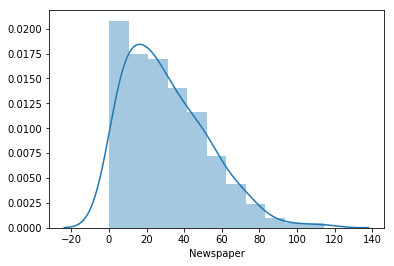

In [7]:
sns.distplot(advert.Newspaper)

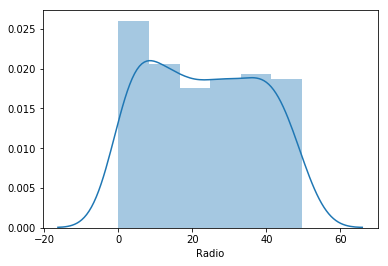

In [8]:
sns.distplot(advert.Radio)

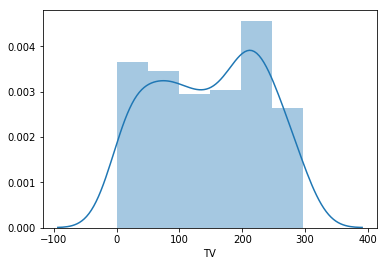

In [9]:
sns.distplot(advert.TV)

# Exploring Relationship Between Predictors and Response

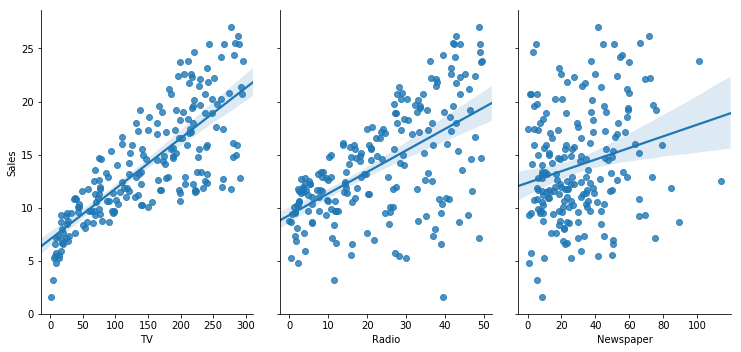

In [23]:
sns.pairplot(advert,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=5,aspect=0.7,kind='reg')

In [11]:
advert.TV.corr(advert.Sales)

0.7822244248616061

In [12]:
advert.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


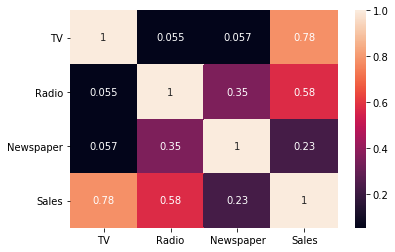

In [13]:
sns.heatmap(advert.corr(),annot=True)

# Creating Simple Linear Regression Model

In [14]:
x=advert[['TV']]
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [15]:
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [16]:
y=advert[['Sales']]
y.head()

print(type(y))
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150, 1)
(50, 1)


In [19]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Intercepting Model Cofficients

In [20]:
print(linreg.intercept_)
print(linreg.coef_)

[6.91197262]
[[0.04802945]]


# Making Predictions With The Model

In [21]:
y_pred=linreg.predict(x_test)
y_pred[:5]

array([[17.03658069],
       [16.63793625],
       [11.50839099],
       [20.36982452],
       [19.10184704]])

# Model Evaluation Matrics

In [22]:
#Calculating ROOT MEAN SQUARED ERROR

from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(y_test,y_pred)))

3.210929707703542
